In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as st

## Gennaio 2019
### Esercizio 0
$X \in (-1,1)$ con P(X = 1 ) = p

### 0.1
$$1-P(X=1) = P(X = -1) = 1- p$$

### 0.2  
$$E(X) = \sum x_i P(X = x_i) = p + (-1)(1-p) = 2p -1$$

### 0.3
$$p = \frac{E(X)}{2} +1$$

### 0.4
$$Y = g(x) = X^2 = 1$$ sia per X=1 che per X = -1

### 0.5
$$E(Y) = E(g(X)) = E(X^2) = \sum g(X_i)P(X = X_i) = p + 1-p = 1$$

### 0.6
$Var(X) = E(X^2) - E(X)^2 = E(Y) - E(X)^2 = 1 - (2p-1)^2 = 1- (4p^2 +1 -4p) = 4p-4p^2 =$
$$4p(1-p)$$

### 0.7
$h: R \rightarrow R$ tale che sia una bernoulliana.

$$Z = h(X) = \frac{X+1}{2}$$

### 0.8

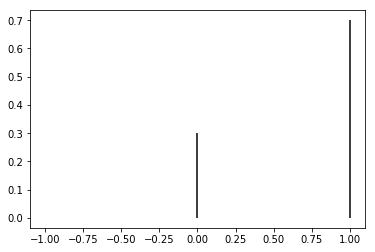

In [2]:
# grafico f_x,F_x,f_z,F_z
y = st.bernoulli(0.7)
x = np.arange(-1,2)
plt.vlines(x,0,y.pmf(x))
plt.show()

### Esercizio 1
### 1.1
$$E(\overline{X}) = E(X) = 2p-1$$

### 1.2-1.3
$$Var(\overline{X}) = \frac{1}{n}Var(X) = \frac{4p(1-p)}{n}$$

### 2
$T_n = \frac{1+\overline{X}}{2}$ dimostrare che non è distorto per p

$$E(\frac{1+\overline{X}}{2}) = E(\frac{1}{2}+\frac{1}{2}\sum\frac{X_i}{n}) = \frac{1}{2} + \frac{1}{2n}\sum E(X_i) = \frac{1}{2}+\frac{n}{2n} E(X) = \frac{1}{2} + \frac{2p-1}{2} = \frac{2p-1+1}{2} = p$$

### 3
$P(|T_n - p| \leq 0.05)$  

Standardizzo  $$P(\frac{|T_n - 2p\sqrt{n}|}{\sigma}\leq \frac{2*0.05\sqrt{n}}{\sigma}) = P(|Z| \leq \frac{0.1\sqrt{n}}{\sigma})  \approx \Phi(\frac{0.1\sqrt{n}}{\sigma}) - \Phi(- \frac{0.1\sqrt{n}}{\sigma}) = 2\Phi(\frac{0.1\sqrt{n}}{\sigma}) -1$$

### Esercizio 2
$G \sim Exp(\nu)$

### 2.1
$$D_X = [0,\infty)$$

### 2.2
$$f_G = \nu e^{-nu x}$$
### 2.3

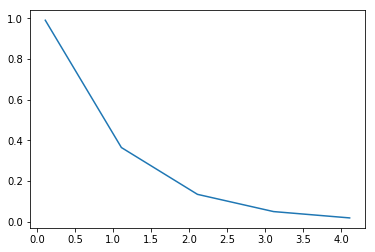

In [3]:
nu = 0.1
y = st.expon(nu)
x = np.arange(y.ppf(0.01),y.ppf(0.99))
plt.plot(x,y.pdf(x))
plt.show()

### 2.4
$$\sqrt(Var(G)) = \frac{1}{\nu} = E(X)$$

### 2.5
$$E(G) = 10 $$ figura a poichè l'area sopra la curva è maggiore.

In [4]:
car = pd.read_csv("carsharing.csv",delimiter=";",decimal=",")
car.columns

Index(['CarIdentifier', 'TimeFrame', 'RushHour', 'PremiumCustomer', 'Distance',
       'Time'],
      dtype='object')

### Esercizio 3
### 3.1

In [25]:
len(car)

392

### 3.2.1

In [6]:
print("Qualitativo ORDINALE: {}".format(car['TimeFrame'].unique()))

Qualitativo ORDINALE: ['FRAME D' 'FRAME B' 'FRAME C' 'FRAME E' 'FRAME A']


### 3.2.2

In [7]:
len(car['TimeFrame'].unique())

5

### 3.2.3

In [8]:
car['TimeFrame'].value_counts().sort_values().tail(2)
#pd.crosstab(index=car['TimeFrame'].sort_values(),columns=['Abs. Freq.'],colnames=[''])

FRAME C    107
FRAME B    123
Name: TimeFrame, dtype: int64

### 3.2.4

In [9]:
pd.crosstab(index=car['TimeFrame'],columns=car['RushHour'],colnames=['Rush Hour'])

Rush Hour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


### 3.2.5

In [10]:
print("FRAME B e poi FRAME D")

FRAME B e poi FRAME D


### 3.3.1

In [26]:
carP = car[car['PremiumCustomer'] == 1]
len(carP)

227

### 3.3.2

In [27]:
carP['Distance'].mean()

8.437444933920705

### 3.3.3

In [28]:
car.PremiumCustomer.mean()

0.15816326530612246

### 3.3.4
Media campionaria

### 3.3.5 
$$P(|Tn - E(X)| < 0.05) < 1 - \frac{Var(X)}{n*(0.05)^2}$$
Non so

In [31]:
1-(car.PremiumCustomer.std()/((0.05**2)*len(car.PremiumCustomer)))

-0.00885188191255537

### 3.4.1

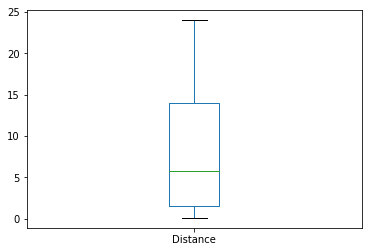

In [15]:
car['Distance'].plot.box()
plt.show()

### 3.4.2

In [16]:
car['Distance'].describe()

count    392.000000
mean       7.858673
std        6.805123
min        0.100000
25%        1.575000
50%        5.750000
75%       14.025000
max       24.000000
Name: Distance, dtype: float64

In [17]:
print('Indice di Centralità = Mediana: {}\nIndice di Dispersione = Range Interquartile : {}'.format(car['Distance'].quantile(0.5),(car['Distance'].quantile(0.75)-car['Distance'].quantile(0.25))))

Indice di Centralità = Mediana: 5.75
Indice di Dispersione = Range Interquartile : 12.45


### 3.4.3

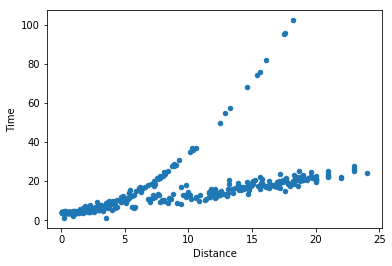

Due Andamenti differenti. No relazione


In [18]:
car.plot.scatter('Distance','Time')
plt.show()
print("Due Andamenti differenti. No relazione")

### 3.4.2

In [19]:
print("L'indice di correlazione {} conferma il fatto che non vi è una relazine di alcun tipo".format(car['Distance'].corr(car['Time'])))

L'indice di correlazione 0.6273992247694647 conferma il fatto che non vi è una relazine di alcun tipo


### 3.5.1

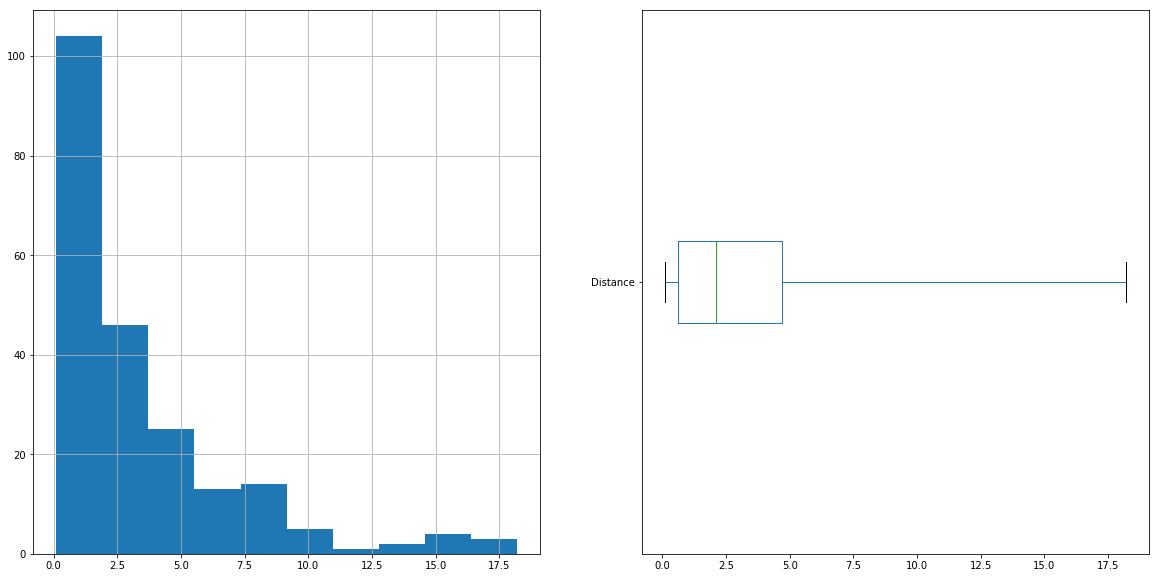

In [20]:
carD = car[car['RushHour'] == 1]['Distance']
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
carD.hist()
plt.subplot(1,2,2)
carD.plot.box(vert=False,whis='range')
plt.show()

### 3.5.2

In [21]:
print("No in quanto l'istogramma mostra che segueuna distribuzione esponenziale")

No in quanto l'istogramma mostra che segueuna distribuzione esponenziale


### 3.5.3

In [22]:
print(carD.mean())
print(carD.std())

3.3193548387096796
3.711106147915895


### 3.5.4

In [23]:
print("Esponenziale")

Esponenziale


### 3.5.5

In [24]:
print("Si perchè sono molto simili")

Si perchè sono molto simili
